### Imports

In [113]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Data Preparation

In [40]:
# Data loading
file_path = Path("crypto_data.csv")

df_crypto = pd.read_csv(file_path)

df_crypto = df_crypto.rename(columns={"Unnamed: 0":"Abbrev"})

df_crypto.head(10)




,Abbrev,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.0
1,2015,2015 coin,X11,True,PoW/PoS,NaN,0.0
2,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.0
3,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0.0
4,DT,DarkToken,NIST5,True,PoW/PoS,NaN,0.0
5,CETI,CETUS Coin,Scrypt,True,PoW/PoS,NaN,0.0
6,AGS,Aegis,X13,True,PoS,NaN,0.0
7,BLU,BlueCoin,Scrypt,True,PoW/PoS,6.354239e+08,0.0
8,ENRG,EnergyCoin,Scrypt,True,PoW/PoS,1.230628e+08,0.0
9,CAIX,CAIx,Scrypt,True,PoS,NaN,0.0


In [42]:
df_crypto

,Abbrev,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00
1,2015,2015 coin,X11,True,PoW/PoS,NaN,0.000000e+00
2,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00
3,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0.000000e+00
4,DT,DarkToken,NIST5,True,PoW/PoS,NaN,0.000000e+00
...,...,...,...,...,...,...,...
1247,BTT,BitTorrent,TRC10,True,DPoS,9.899890e+11,9.900000e+11
1248,TRTL,TurtleCoin,CryptoNight,True,PoW,5.313984e+10,1.000000e+12
1249,PZM,Prizm,SHA-256,True,PoS,NaN,6.000000e+14
1250,VAL,Valorbit,Scrypt,True,PoW/PoS,0.000000e+00,9.223372e+16


In [43]:
#df_crypto_Trading = df_crypto.drop()

for index, row in df_crypto.iterrows():
    if row['IsTrading'] == False:
        df_crypto.drop(index, inplace=True)

In [44]:
df_crypto = df_crypto.dropna()

In [45]:
df_crypto

,Abbrev,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00
2,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00
3,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0.000000e+00
7,BLU,BlueCoin,Scrypt,True,PoW/PoS,6.354239e+08,0.000000e+00
8,ENRG,EnergyCoin,Scrypt,True,PoW/PoS,1.230628e+08,0.000000e+00
...,...,...,...,...,...,...,...
1241,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11
1243,MOON,MoonCoin,Scrypt,True,PoW,8.800000e+01,3.840000e+11
1247,BTT,BitTorrent,TRC10,True,DPoS,9.899890e+11,9.900000e+11
1248,TRTL,TurtleCoin,CryptoNight,True,PoW,5.313984e+10,1.000000e+12


In [46]:
df_tradingMinedCoins = df_crypto.loc[df_crypto['TotalCoinsMined']>0]

In [47]:
df_tradingMinedCoins

,Abbrev,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
2,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00
3,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0.000000e+00
7,BLU,BlueCoin,Scrypt,True,PoW/PoS,6.354239e+08,0.000000e+00
8,ENRG,EnergyCoin,Scrypt,True,PoW/PoS,1.230628e+08,0.000000e+00
11,EXCL,Exclusive Coin,PoS,True,PoS,5.679705e+06,0.000000e+00
...,...,...,...,...,...,...,...
1238,GCN,gCn Coin,Scrypt,True,PoW,1.630550e+11,2.000000e+11
1241,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11
1243,MOON,MoonCoin,Scrypt,True,PoW,8.800000e+01,3.840000e+11
1247,BTT,BitTorrent,TRC10,True,DPoS,9.899890e+11,9.900000e+11


In [48]:
df_tradingMinedCoins.drop(columns=['CoinName','Abbrev', 'IsTrading'], inplace=True)

/Users/xanroseberry/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df_dummy = pd.get_dummies(df_tradingMinedCoins, drop_first=True)

In [78]:
df_dummy.reset_index(drop=True)

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.720114e+07,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.354239e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.230628e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5.679705e+06,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1.630550e+11,2.000000e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,8.800000e+01,3.840000e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,9.899890e+11,9.900000e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummy[['TotalCoinsMined','TotalCoinSupply']])

In [84]:
df_scaled = pd.DataFrame(scaled_data,columns=['TotalCoinsMined','TotalCoinSupply'])

In [85]:
df_scaled

,TotalCoinsMined,TotalCoinSupply
0,-0.114747,-0.152870
1,-0.116731,-0.152870
2,-0.103174,-0.152870
3,-0.114410,-0.152870
4,-0.116984,-0.152870
...,...,...
527,3.458442,2.802506
528,0.524945,4.489424
529,-0.117108,5.521452
530,21.591856,14.476243


In [86]:
df_one_hot= df_dummy.drop(columns=['TotalCoinsMined','TotalCoinSupply'])

In [91]:
df_one_hot.reset_index(drop=True, inplace=True)

In [98]:
scaledEncoded_df = df_one_hot.copy()

In [99]:
scaledEncoded_df['TotalCoinsMined'] = df_scaled['TotalCoinsMined']

In [100]:
scaledEncoded_df['TotalCoinSupply'] = df_scaled['TotalCoinSupply']

In [101]:
scaledEncoded_df

,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114747,-0.152870
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116731,-0.152870
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.103174,-0.152870
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114410,-0.152870
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116984,-0.152870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.458442,2.802506
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.524945,4.489424
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.117108,5.521452
530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21.591856,14.476243


### Dimensionality Reduction

In [107]:
pca_99 = PCA(n_components=0.99)

pca_90 = PCA(n_components=0.90)

In [108]:
preserve99 = pca_99.fit_transform(scaledEncoded_df)
preserve90 = pca_90.fit_transform(scaledEncoded_df)

In [109]:
preserve90_df = pd.DataFrame(preserve90)
preserve99_df = pd.DataFrame(preserve99)

In [112]:
preserve90_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.173289,0.688574,-0.154398,0.131930,-0.212559,-0.104395,-0.242159,0.002997,0.113058,-0.125668,0.058178,-0.129383
1,-0.174065,0.679177,-0.150275,0.124063,-0.214142,-0.098164,-0.215111,0.004412,0.077861,-0.087258,0.023164,-0.067299
2,-0.199440,-0.803803,0.163421,-0.672987,-0.028697,-0.027304,0.002095,-0.017570,-0.047699,-0.022894,-0.007828,0.015879
3,-0.207372,-0.802156,0.171125,-0.672503,-0.028151,-0.027337,0.002153,-0.016995,-0.047480,-0.023003,-0.007846,0.015813
4,-0.196215,-0.144177,-0.103749,0.712425,0.952712,-0.021033,-0.162363,-0.184628,-0.117434,-0.461382,-0.529231,-0.125577
...,...,...,...,...,...,...,...,...,...,...,...,...
527,4.432143,0.375248,-0.500523,-0.766632,0.072812,0.153224,0.122783,-0.115851,0.087918,-0.063653,0.012231,-0.026962
528,3.529673,-0.305515,2.915412,0.414781,-0.163305,-0.259270,-0.278503,-0.152146,0.747550,0.360582,-0.233799,-0.070236
529,3.827845,1.210557,3.834231,-0.490903,0.374496,0.166988,0.218585,0.133759,0.264558,-0.189489,0.027548,-0.060213
530,25.530657,-1.592084,-4.869970,0.068842,-0.260161,0.049842,0.071258,0.102169,0.061596,-0.114077,0.025613,-0.017068


In [219]:
tsne= TSNE(learning_rate=120, random_state=5)

In [220]:
tsne_preserve_90 = tsne.fit_transform(preserve90)

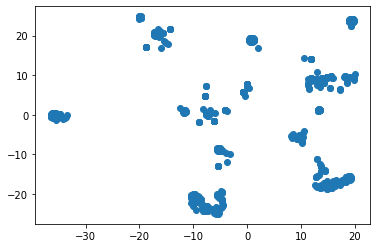

In [221]:
plt.scatter(tsne_preserve_90[:,0], tsne_preserve_90[:,1])

### Cluster Analysis with k-Means

In [168]:
inertiaTest = []

kCluster = [1,2,3,4,5,6,7,8,9,10]

for i in kCluster:
    kmodel = KMeans(n_clusters=i, random_state=4)
    kmodel.fit(scaledEncoded_df)
    inertiaTest.append(kmodel.inertia_)

In [169]:
elbow_chart_data = {"k":kCluster, "inertia":inertiaTest}

In [170]:
ecd_df = pd.DataFrame(elbow_chart_data)

In [173]:
ecd_df

,k,inertia
0,1,1867.808271
1,2,1183.567520
2,3,983.554643
3,4,777.759626
4,5,664.003752
5,6,569.454572
6,7,513.216394
7,8,464.677013
8,9,436.840345
9,10,414.577681


Text(0, 0.5, 'Inertia')

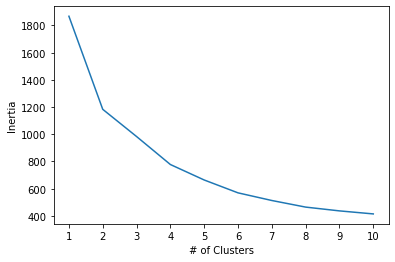

In [174]:
plt.plot(ecd_df['k'], ecd_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

It appears that the elbow of plot is around 6 as this is the place where drops begin to become less drastic

### Observations/Recommendation

Based on findings, it does appear that there are defined groupings among the types of cryptocurrencies. Based on dimensionality reduction techniques and k Means clustering, it appears that there are at least 3-4 strong clusters with several other patterns beginning to form.